In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

lap_times_df = pd.DataFrame(data=pd.read_csv('data/lap_times.csv'))
driver_ids_df = pd.DataFrame(data=pd.read_csv('data/drivers.csv'))

In [44]:
# specify to 2022 mexico race
mexico_lap_times_df = lap_times_df.loc[lap_times_df['raceId'] == 1094]

# specify unique drivers during race
drivers = mexico_lap_times_df['driverId'].unique()

# function to get time from driver id
def get_lap_time(driver_id):

    driver_lap_times = mexico_lap_times_df.loc[mexico_lap_times_df['driverId'] == driver_id, 'milliseconds']
    
    return driver_lap_times

# function to get name from driver id
def get_driver_name(driver_id):

    driver_names = driver_ids_df.loc[driver_ids_df['driverId'] == driver_id, 'driverRef']

    return driver_names

drivers_dict = {}
name_dict = {}

for driver in drivers:
    name_dict[driver] = get_driver_name(driver)
    drivers_dict[driver] = get_lap_time(driver)


# updating drivers dict manually until we can pull names out cleanly
drivers_dict['Verstappen'] = drivers_dict[830]
del drivers_dict[830]
drivers_dict['Hamilton'] = drivers_dict[1]
del drivers_dict[1]
drivers_dict['Perez'] = drivers_dict[815]
del drivers_dict[815]
drivers_dict['Russell'] = drivers_dict[847]
del drivers_dict[847]
drivers_dict['Sainz'] = drivers_dict[832]
del drivers_dict[832]
drivers_dict['Leclerc'] = drivers_dict[844]
del drivers_dict[844]
drivers_dict['Alsono'] = drivers_dict[4]
del drivers_dict[4]
drivers_dict['Bottas'] = drivers_dict[822]
del drivers_dict[822]
drivers_dict['Ocon'] = drivers_dict[839]
del drivers_dict[839]
drivers_dict['Norris'] = drivers_dict[846]
del drivers_dict[846]
drivers_dict['Tsunoda'] = drivers_dict[852]
del drivers_dict[852]
drivers_dict['Zhou'] = drivers_dict[855]
del drivers_dict[855]
drivers_dict['Ricciardo'] = drivers_dict[817]
del drivers_dict[817]
drivers_dict['Vettel'] = drivers_dict[20]
del drivers_dict[20]
drivers_dict['Stroll'] = drivers_dict[840]
del drivers_dict[840]
drivers_dict['Gasly'] = drivers_dict[842]
del drivers_dict[842]
drivers_dict['Shumacher'] = drivers_dict[854]
del drivers_dict[854]
drivers_dict['Magnussen'] = drivers_dict[825]
del drivers_dict[825]
drivers_dict['Albon'] = drivers_dict[848]
del drivers_dict[848]
drivers_dict['Latifi'] = drivers_dict[849]
del drivers_dict[849]




In [43]:
print(driver_names)

{830: 829    Verstappen
Name: surname, dtype: object, 1: 0    Hamilton
Name: surname, dtype: object, 815: 814    Pérez
Name: surname, dtype: object, 847: 845    Russell
Name: surname, dtype: object, 832: 831    Sainz
Name: surname, dtype: object, 844: 842    Leclerc
Name: surname, dtype: object, 4: 3    Alonso
Name: surname, dtype: object, 822: 821    Bottas
Name: surname, dtype: object, 839: 838    Ocon
Name: surname, dtype: object, 846: 844    Norris
Name: surname, dtype: object, 852: 850    Tsunoda
Name: surname, dtype: object, 855: 853    Zhou
Name: surname, dtype: object, 817: 816    Ricciardo
Name: surname, dtype: object, 20: 19    Vettel
Name: surname, dtype: object, 840: 839    Stroll
Name: surname, dtype: object, 842: 452    Gasly
Name: surname, dtype: object, 854: 852    Schumacher
Name: surname, dtype: object, 825: 824    Magnussen
Name: surname, dtype: object, 848: 846    Albon
Name: surname, dtype: object, 849: 847    Latifi
Name: surname, dtype: object}


[Text(1, 0, 'Verstappen'),
 Text(2, 0, 'Hamilton'),
 Text(3, 0, 'Perez'),
 Text(4, 0, 'Russell'),
 Text(5, 0, 'Sainz'),
 Text(6, 0, 'Leclerc'),
 Text(7, 0, 'Alsono'),
 Text(8, 0, 'Bottas'),
 Text(9, 0, 'Ocon'),
 Text(10, 0, 'Norris'),
 Text(11, 0, 'Tsunoda'),
 Text(12, 0, 'Zhou'),
 Text(13, 0, 'Ricciardo'),
 Text(14, 0, 'Vettel'),
 Text(15, 0, 'Stroll'),
 Text(16, 0, 'Gasly'),
 Text(17, 0, 'Shumacher'),
 Text(18, 0, 'Magnussen'),
 Text(19, 0, 'Albon'),
 Text(20, 0, 'Latifi')]

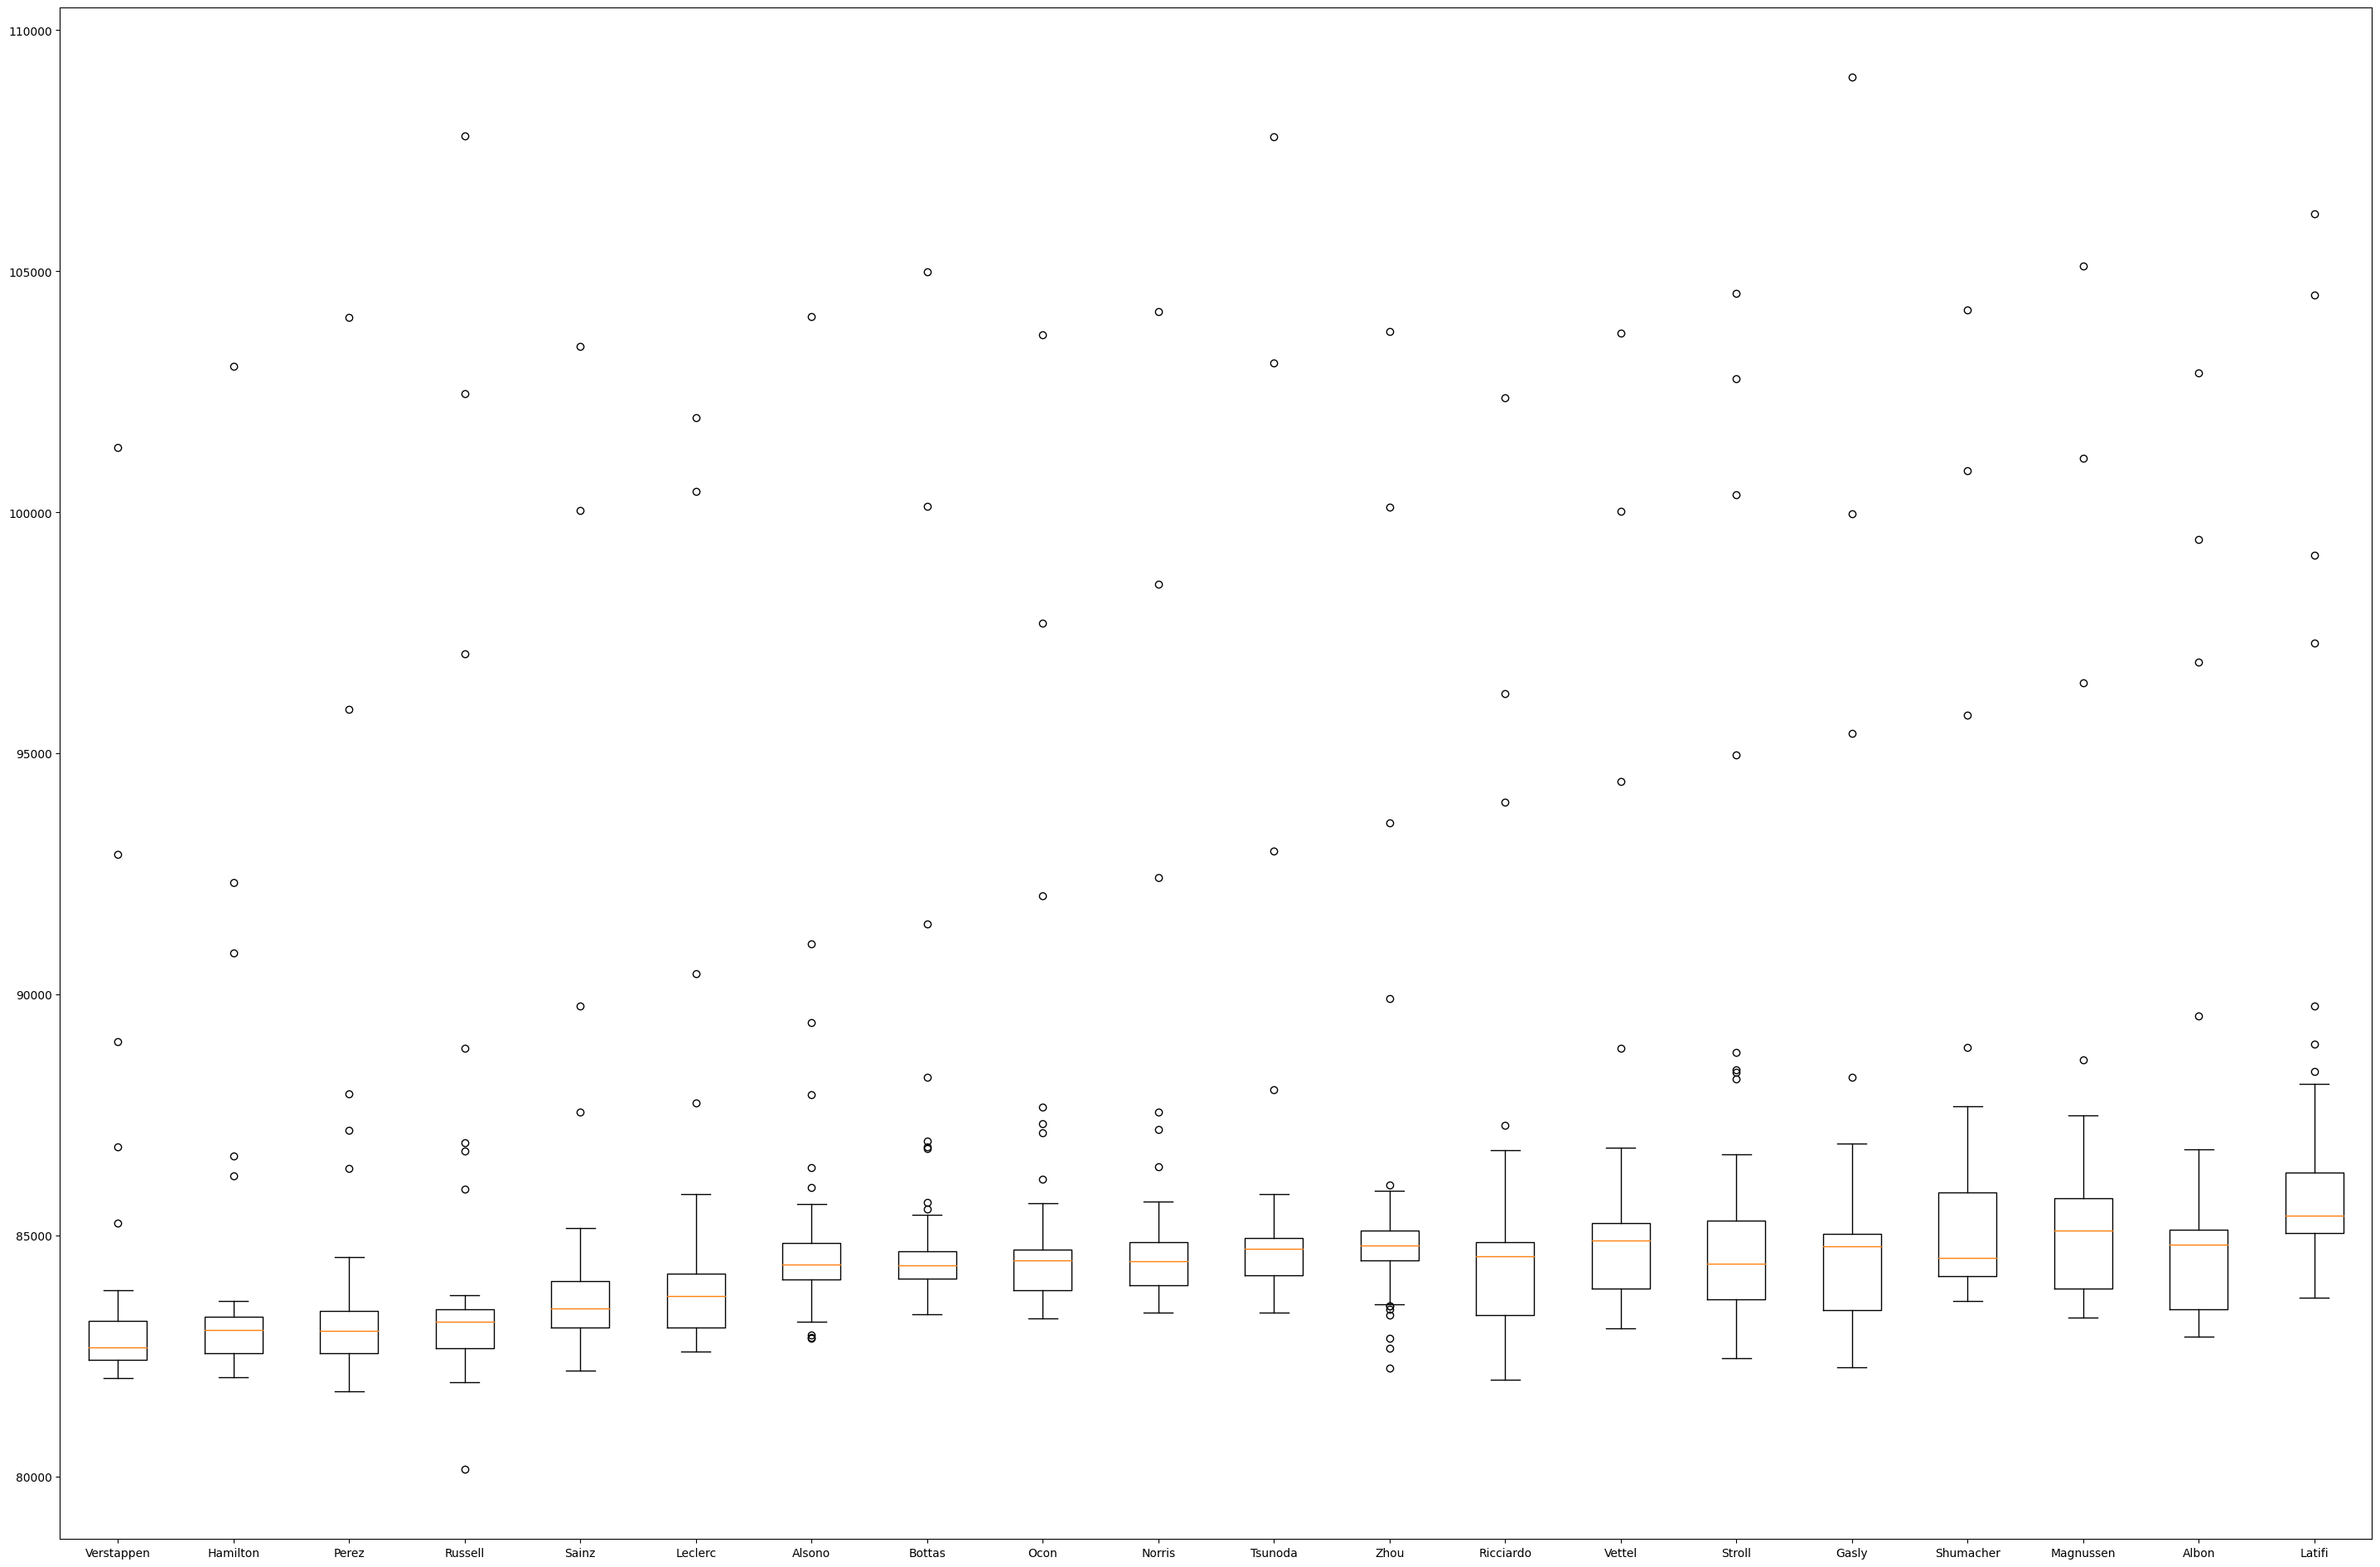

In [45]:
# plot this sucker
fig, ax = plt.subplots(figsize = (36, 24))
ax.boxplot(drivers_dict.values())
ax.set_xticklabels(drivers_dict.keys())

